# Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Data Preprocessing and visualization

In [ ]:
# Read flood data
df = pd.read_csv("/content/flood.csv")
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [ ]:
# Data dimensions (number of rows and columns)
df.shape

(50000, 21)

In [ ]:
# Information about the data, including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [ ]:
# Count missing values
df.isna().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [ ]:
# Count duplicates
df.duplicated().sum()

0

In [ ]:
# Summary statistics of the data
df.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,4.991480,4.984100,5.01594,5.008480,4.989060,4.988340,5.01536,4.988600,5.006120,5.006380,...,5.006060,4.999920,4.984220,4.97982,4.988200,4.984980,5.00512,4.994360,4.990520,0.499660
std,2.236834,2.246488,2.23131,2.222743,2.243159,2.226761,2.24500,2.232642,2.234588,2.241633,...,2.238107,2.247101,2.227741,2.23219,2.231134,2.238279,2.23176,2.230011,2.246075,0.050034
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.285000
25%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000,0.465000
50%,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,0.500000
75%,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,6.000000,0.535000
max,16.000000,18.000000,16.00000,17.000000,17.000000,17.000000,16.00000,16.000000,16.000000,18.000000,...,17.000000,17.000000,16.000000,16.00000,17.000000,19.000000,22.00000,16.000000,16.000000,0.725000


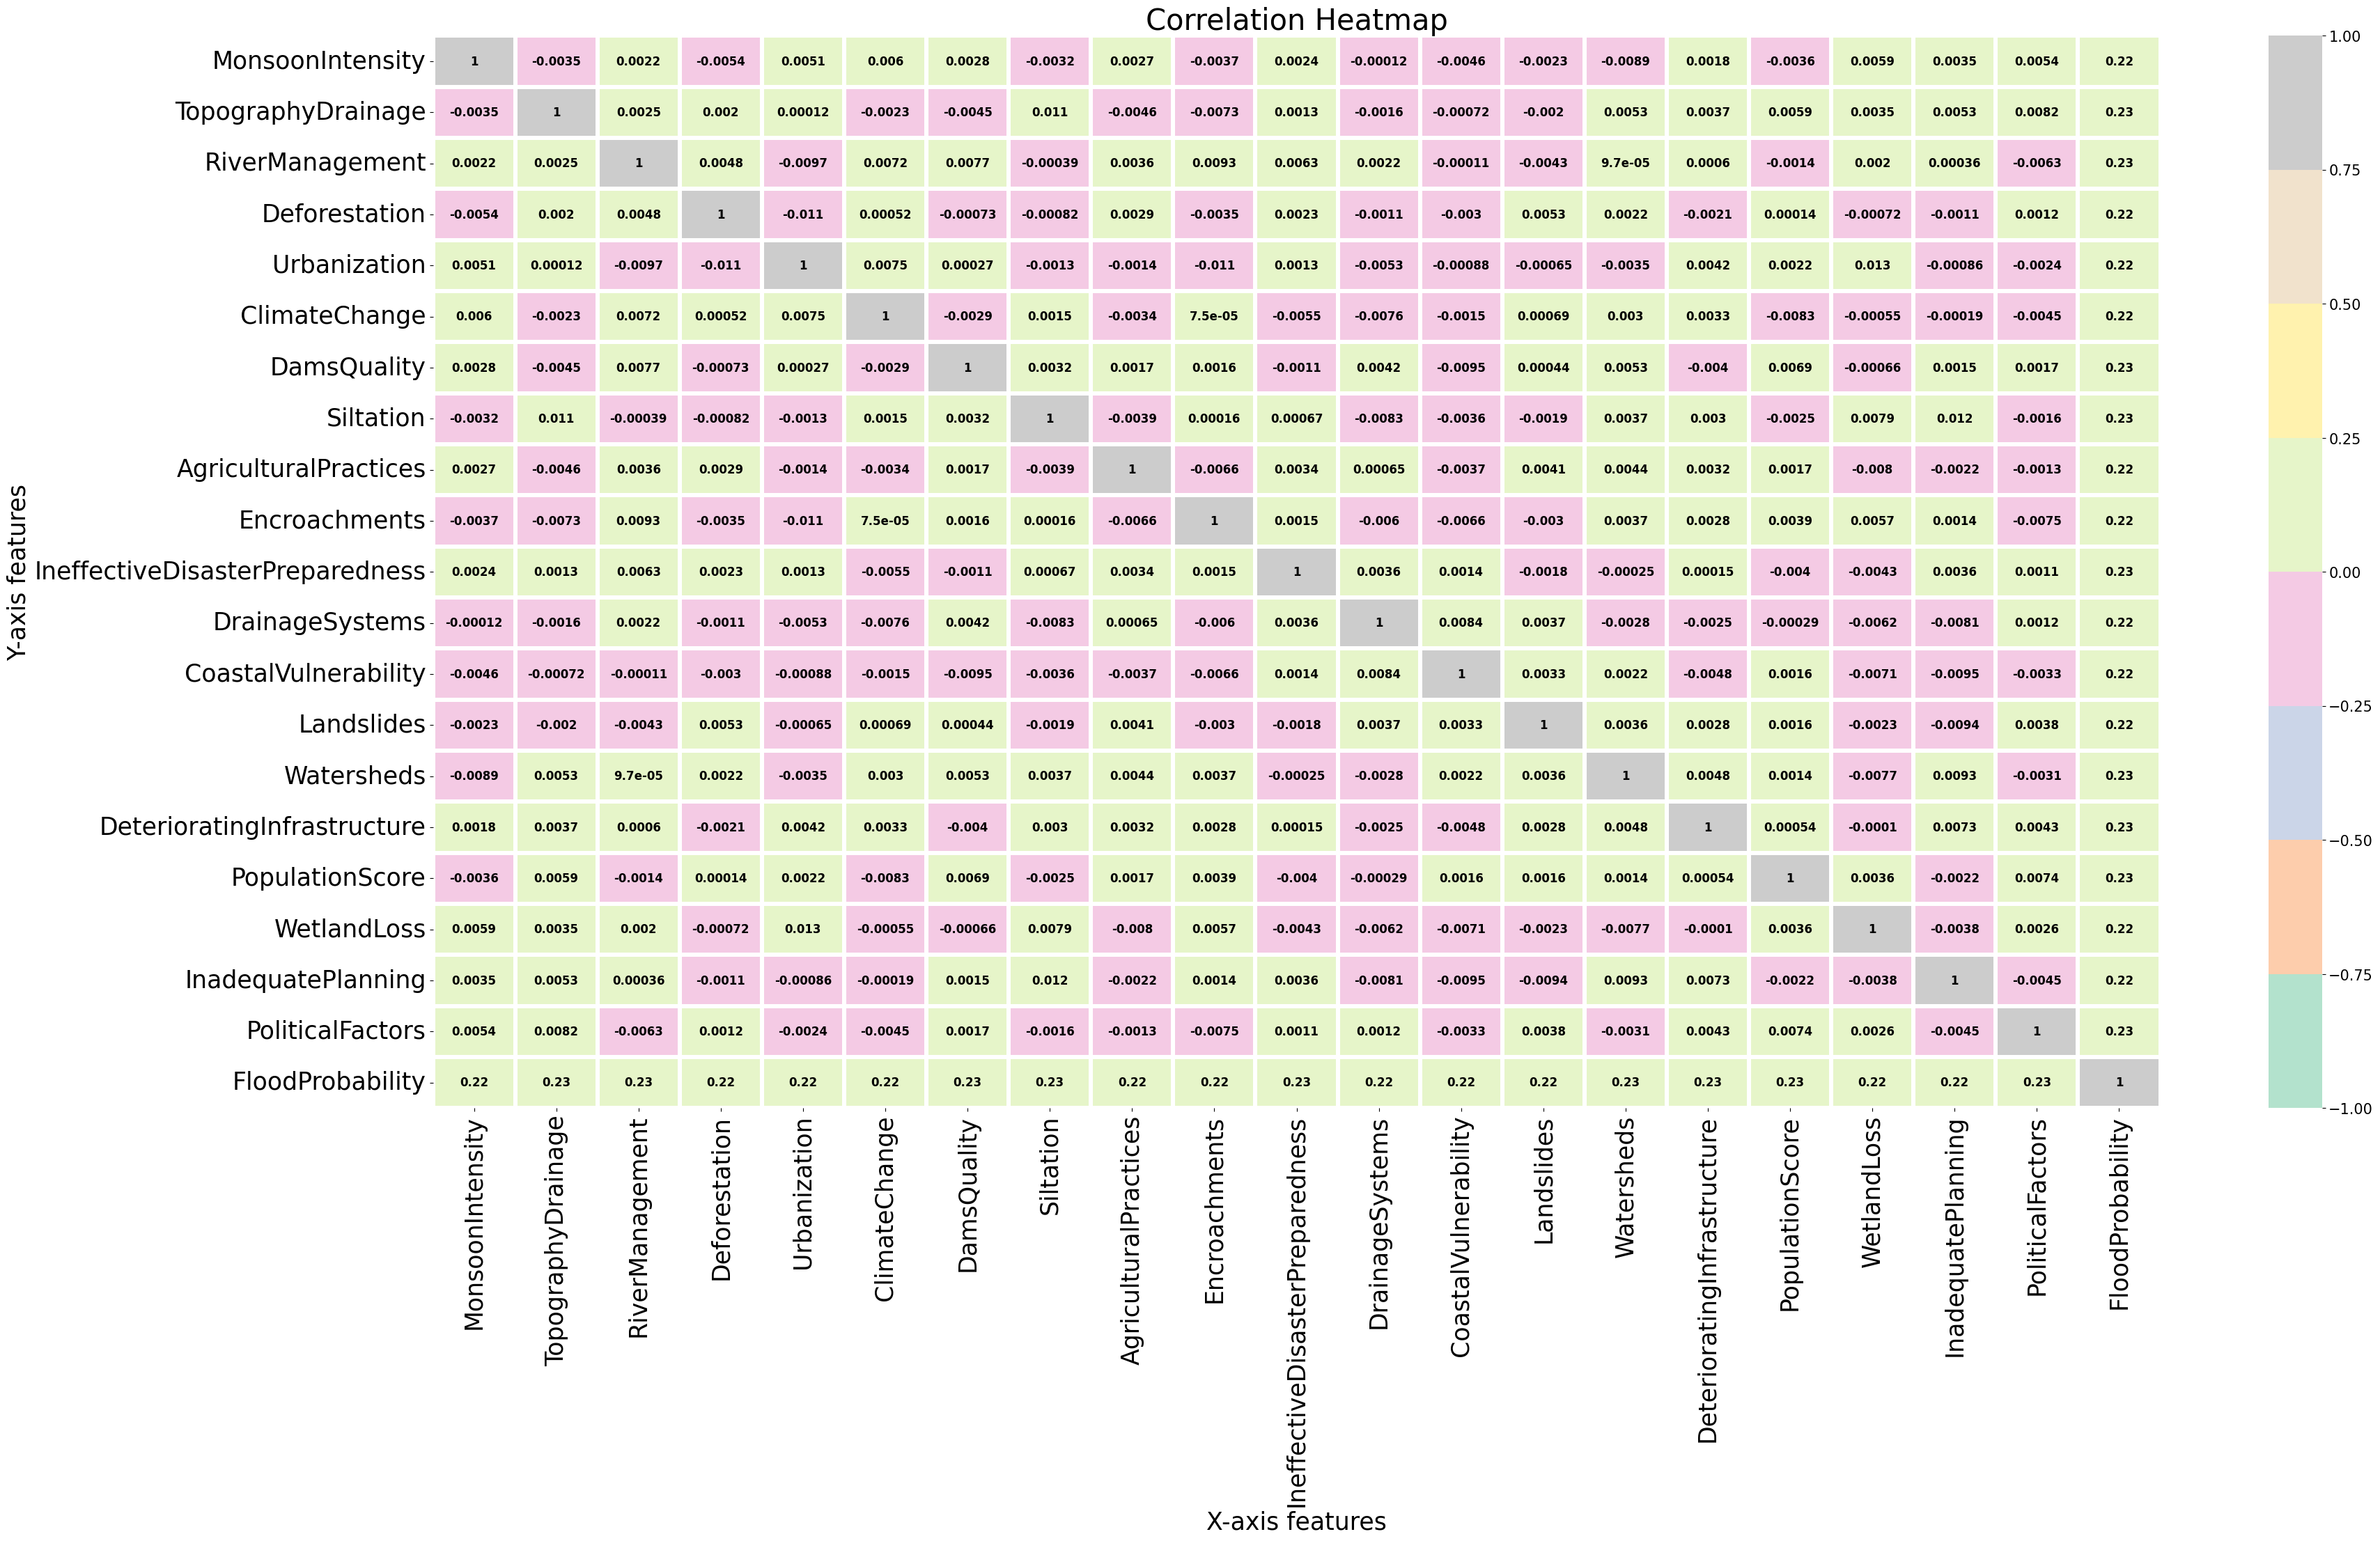

In [ ]:
# visualize the strength of relationships between features
corr = df.corr()

plt.figure(figsize=(40, 20)) # correlation matrix size

heatmap = sns.heatmap(corr,
                      vmin=-1, vmax=1,
                      linewidths=4,        # Adjust line width between squares
                      cmap="Pastel2",      # Choose a colormap for visualization
                      annot=True,          # Display correlation values on the correlation matrix
                      annot_kws={"color": "black",        # Annotations color
                                 "size": 12,              # Annotations size
                                 "fontweight": "bold"})   # Annotations style

cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)  # Colorbar label size

# Axes' labels and title size
plt.xlabel("X-axis features", fontsize=25)
plt.ylabel("Y-axis features", fontsize=25)
plt.title("Correlation Heatmap", fontsize=30)

# Axes tick labels' size
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

# Display the correlation matrix
plt.show()

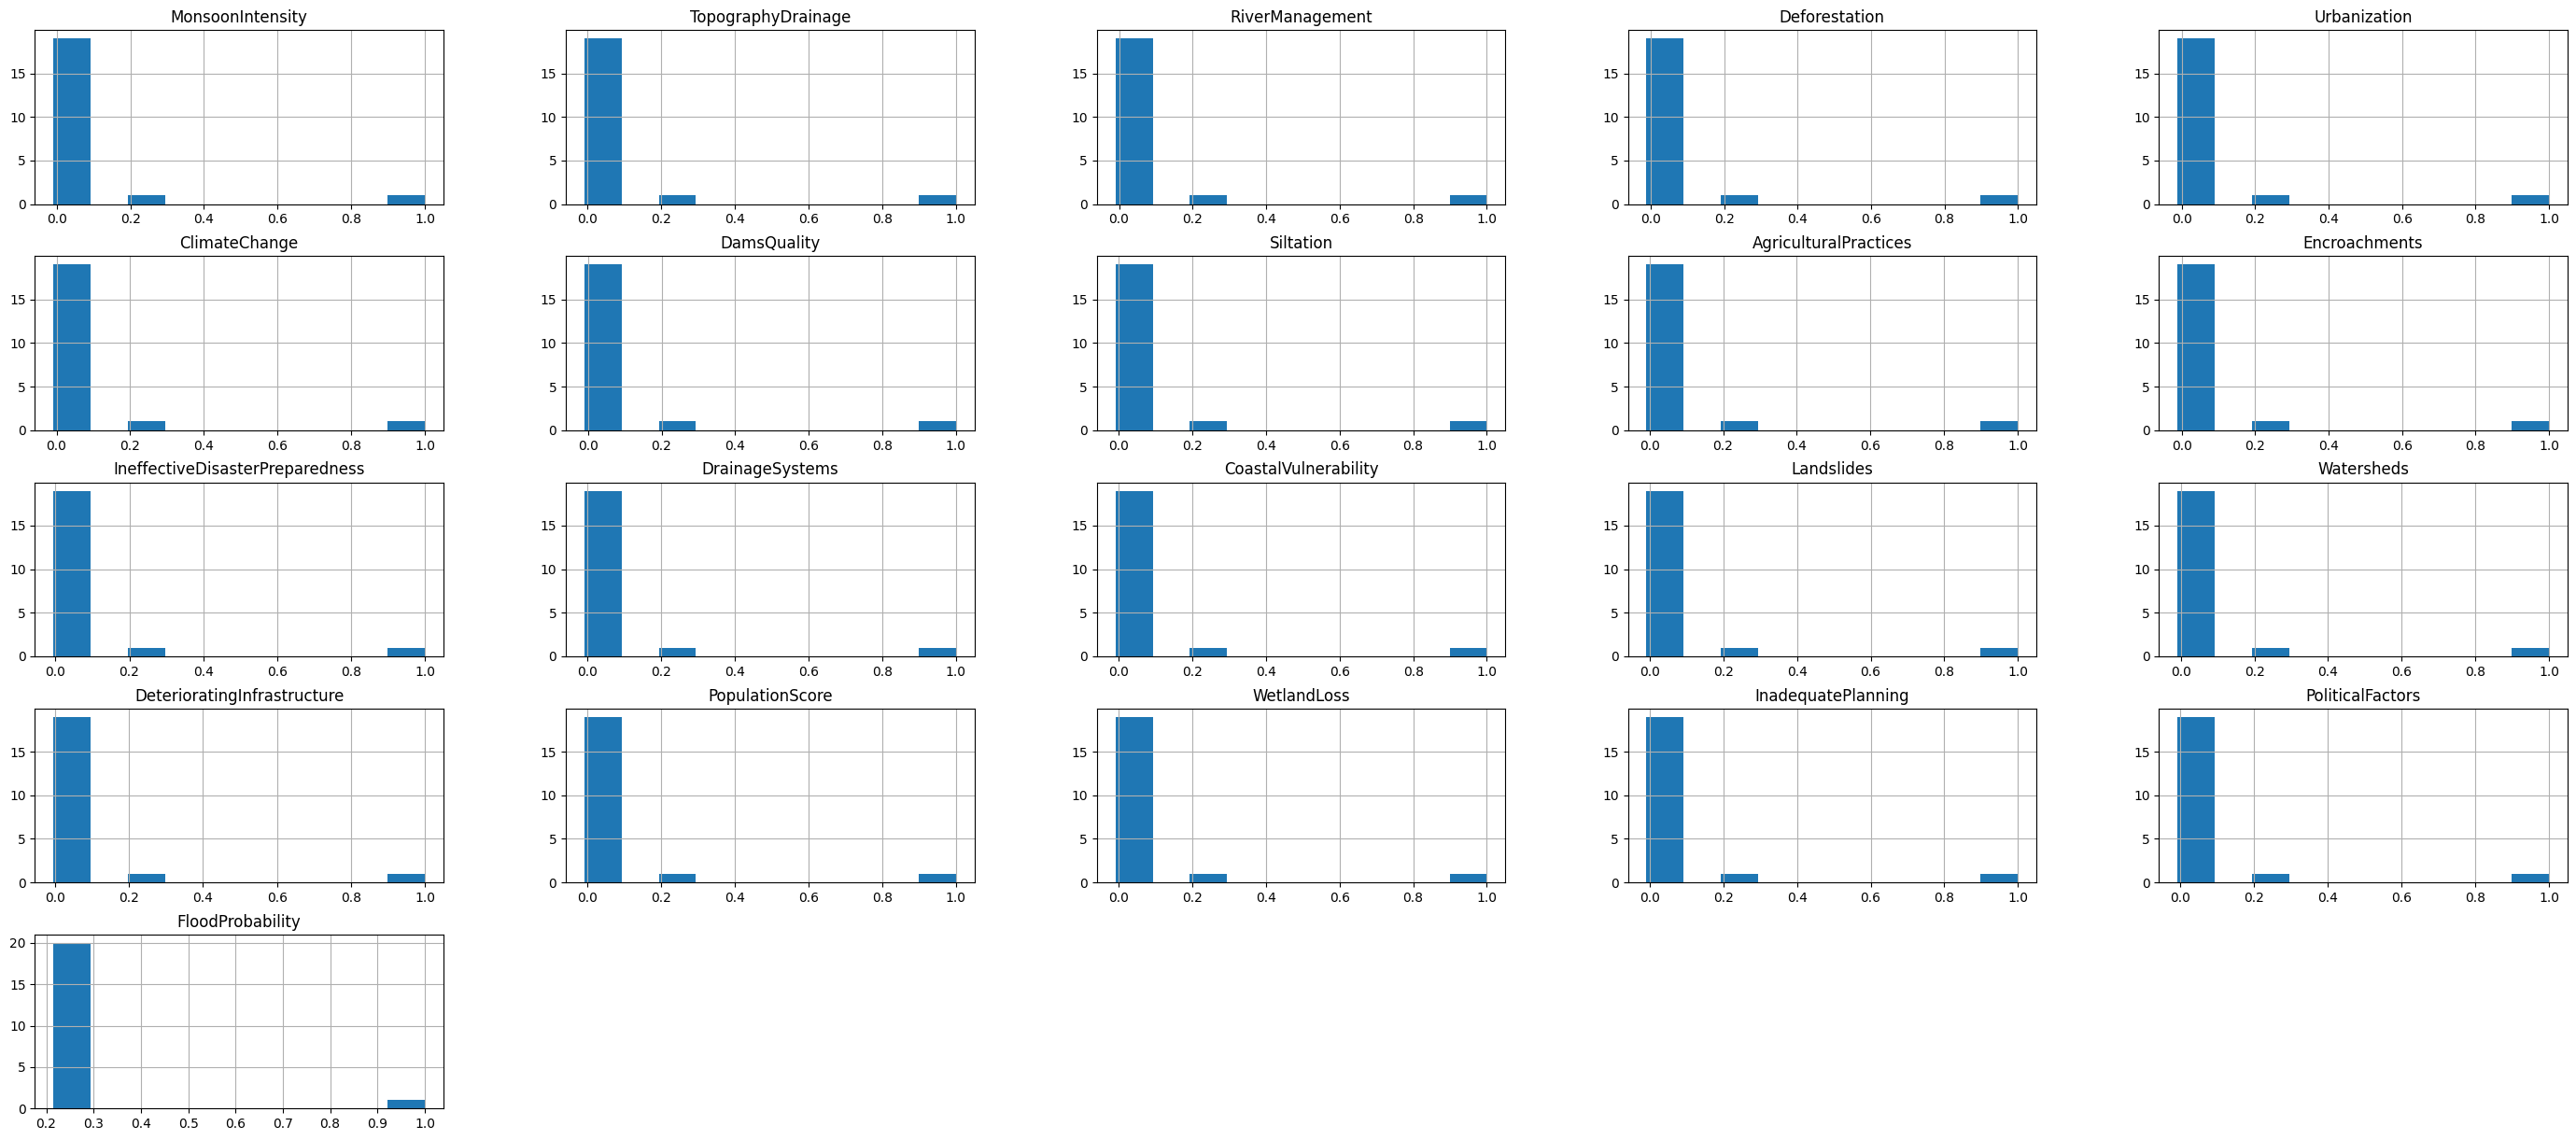

In [ ]:
# Visualize distribution of correlation coefficients
corr.hist(figsize=(35,15))
# Display the histogram
plt.show()

# Train Models

In [ ]:
# Assigns FloodProbability to be the target variable
X = df.drop('FloodProbability', axis=1)
y = df['FloodProbability']

In [ ]:
# Split data into training and testing sets (70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Print the shapes of the training and testing sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(35000, 20)
(35000,)
(15000, 20)
(15000,)


In [ ]:
# Train the Spport Vector Machine model on the training data
svr_model = SVR()
svr_model.fit(X_train, y_train)

SVR()

In [ ]:
# Train the Decision Tree model on the training data
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Train the Multilayer Perceptron model on the training data
mlp_model = MLPRegressor()
mlp_model.fit(X_train, y_train)

MLPRegressor()

In [ ]:
# Train the Linear Regression model on the training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

# Test Models and Evaluation

In [ ]:
# Make predictions on the testing set using the trained Support Vector MAchine model
svr_preds = svr_model.predict(X_test)

In [ ]:
# Make predictions on the testing set using the trained Decision Tree model
dt_preds = dt_model.predict(X_test)

In [ ]:
# Make predictions on the testing set using the trained Multilayer Perceptron model
mlp_preds = mlp_model.predict(X_test)

In [ ]:
# Make predictions on the testing set using the trained Linear Regression model
lr_preds = lr_model.predict(X_test)

In [ ]:
#Evaluation Metrics Function
def evaluate_model(name, y_true, y_pred):

    print(f"{name} Model:")

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"Mean Absolute Error: {mae:.5f}")

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_true, y_pred)
    print(f"Mean Squared Error: {mse:.5f}")

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    print(f"Root Mean Squared Error: {rmse:.5f}")

    # Calculate R-squared (R²)
    r2 = r2_score(y_true, y_pred)
    print(f"R^2 Score: {r2:.5f}")

    print("_________________________________________________")

In [ ]:
# Print model evaluation results
evaluate_model("SVR", y_test, svr_preds)
evaluate_model("Decision Tree", y_test, dt_preds)
evaluate_model("MLP", y_test, mlp_preds)
evaluate_model("Linear Regression", y_test, lr_preds)

SVR Model:
Mean Absolute Error: 0.02073
Mean Squared Error: 0.00073
Root Mean Squared Error: 0.02707
R^2 Score: 0.70792
_________________________________________________
Decision Tree Model:
Mean Absolute Error: 0.03726
Mean Squared Error: 0.00220
Root Mean Squared Error: 0.04688
R^2 Score: 0.12386
_________________________________________________
MLP Model:
Mean Absolute Error: 0.00648
Mean Squared Error: 0.00020
Root Mean Squared Error: 0.01415
R^2 Score: 0.92016
_________________________________________________
Linear Regression Model:
Mean Absolute Error: 0.00000
Mean Squared Error: 0.00000
Root Mean Squared Error: 0.00000
R^2 Score: 1.00000
_________________________________________________


# Actual VS Predicted Visualisation

In [ ]:
# Compare the actual values with the SVR model's predicted values
results_svr = pd.DataFrame({'Actual': y_test, 'SVR Predicted': svr_preds})
print("SVR Model:")
print(results_svr)

SVR Model:
       Actual  SVR Predicted
27632   0.505       0.512533
36119   0.465       0.495355
4796    0.550       0.539745
3648    0.525       0.520410
24501   0.525       0.525918
...       ...            ...
12829   0.525       0.516428
41873   0.555       0.536839
5356    0.525       0.527451
20046   0.525       0.522329
25470   0.550       0.531161

[15000 rows x 2 columns]


In [ ]:
# Compare the actual values with the Decission Tree model's predicted values
results_dt = pd.DataFrame({'Actual': y_test, 'Decision Tree Predicted': dt_preds})
print("Decision Tree Model:")
print(results_dt)

Decision Tree Model:
       Actual  Decision Tree Predicted
27632   0.505                    0.545
36119   0.465                    0.545
4796    0.550                    0.515
3648    0.525                    0.485
24501   0.525                    0.580
...       ...                      ...
12829   0.525                    0.535
41873   0.555                    0.515
5356    0.525                    0.475
20046   0.525                    0.510
25470   0.550                    0.540

[15000 rows x 2 columns]


In [ ]:
# Compare the actual values with the MLP model's predicted values
results_mlp = pd.DataFrame({'Actual': y_test, 'MLP Predicted': mlp_preds})
print("MLP Model:")
print(results_mlp)

MLP Model:
       Actual  MLP Predicted
27632   0.505       0.504412
36119   0.465       0.466761
4796    0.550       0.542875
3648    0.525       0.521319
24501   0.525       0.519419
...       ...            ...
12829   0.525       0.518957
41873   0.555       0.553589
5356    0.525       0.518960
20046   0.525       0.526553
25470   0.550       0.541422

[15000 rows x 2 columns]


In [ ]:
# Compare the actual values with the Linear Regression model's predicted values
results_lr = pd.DataFrame({'Actual': y_test, 'Linear Regression Predicted': lr_preds})
print("Linear Regression Model:")
print(results_lr)

Linear Regression Model:
       Actual  Linear Regression Predicted
27632   0.505                        0.505
36119   0.465                        0.465
4796    0.550                        0.550
3648    0.525                        0.525
24501   0.525                        0.525
...       ...                          ...
12829   0.525                        0.525
41873   0.555                        0.555
5356    0.525                        0.525
20046   0.525                        0.525
25470   0.550                        0.550

[15000 rows x 2 columns]


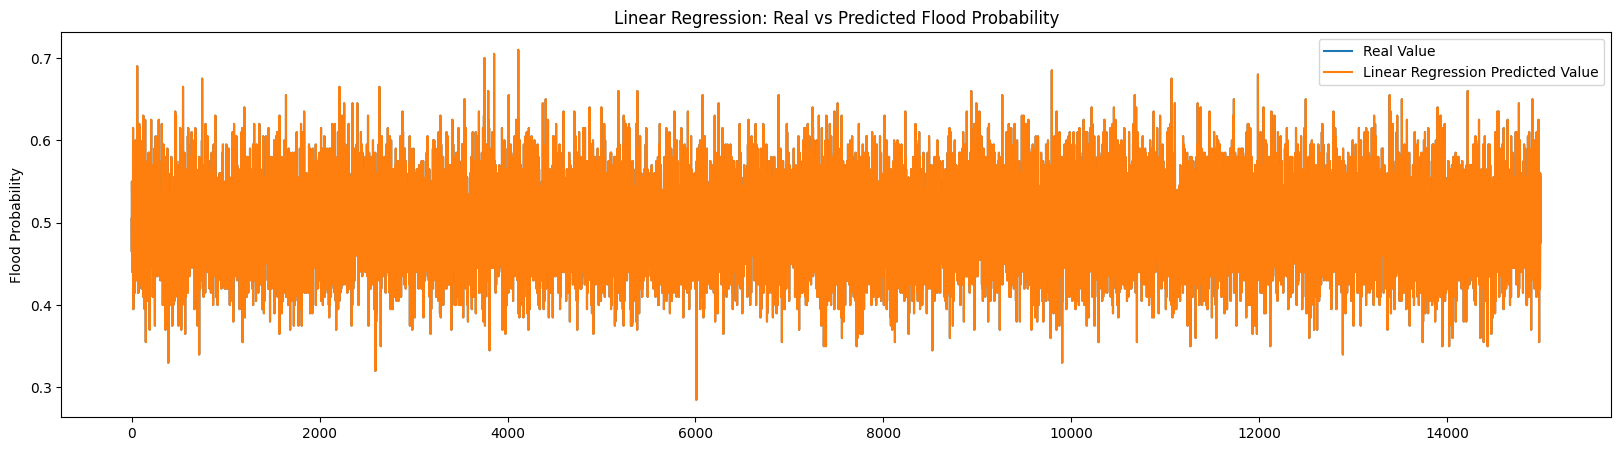

In [ ]:
# Visualizing Linear Regression Predictions Compared to Real Values
plt.figure(figsize=(20, 5)) # Set figure size
plt.plot(y_test.values, label='Real Value')  # Plot real values from y_test
plt.plot(lr_preds, label='Linear Regression Predicted Value')  # Plot model's predicted values
plt.ylabel('Flood Probability') # Set y-axis label
plt.legend() # Add a legend to the plot
plt.title('Linear Regression: Real vs Predicted Flood Probability') # Plot title
plt.show() # Display the plot

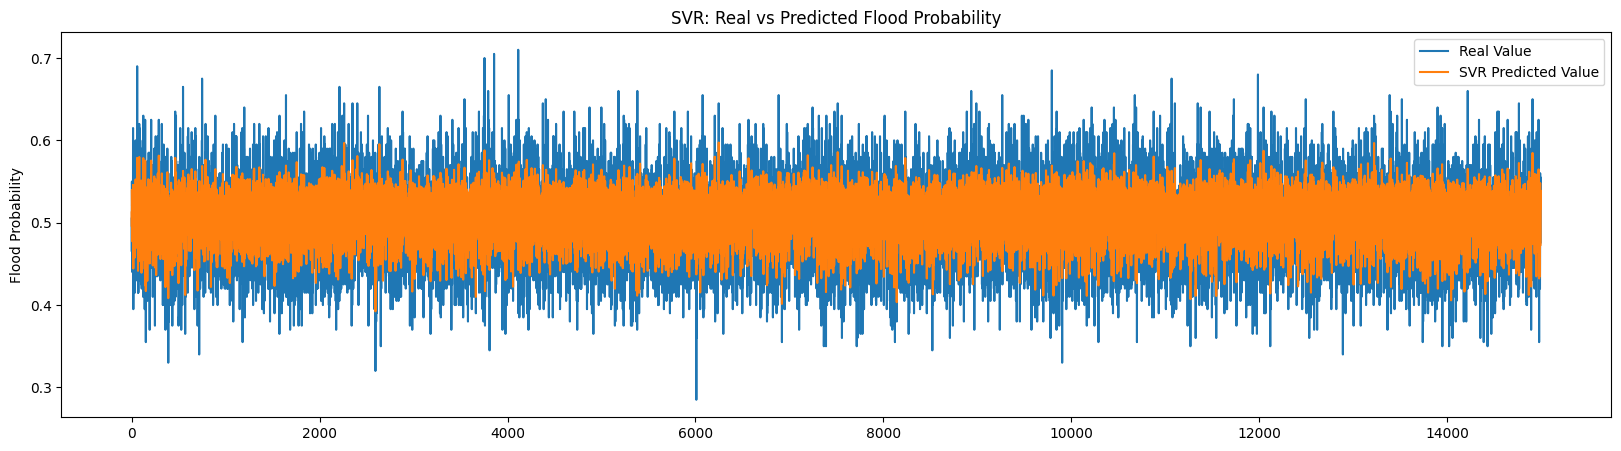

In [ ]:
# Visualizing SVR Predictions Compared to Real Values
plt.figure(figsize=(20, 5))
plt.plot(y_test.values, label='Real Value')
plt.plot(svr_preds, label='SVR Predicted Value')
plt.ylabel('Flood Probability')
plt.legend()
plt.title('SVR: Real vs Predicted Flood Probability')
plt.show()

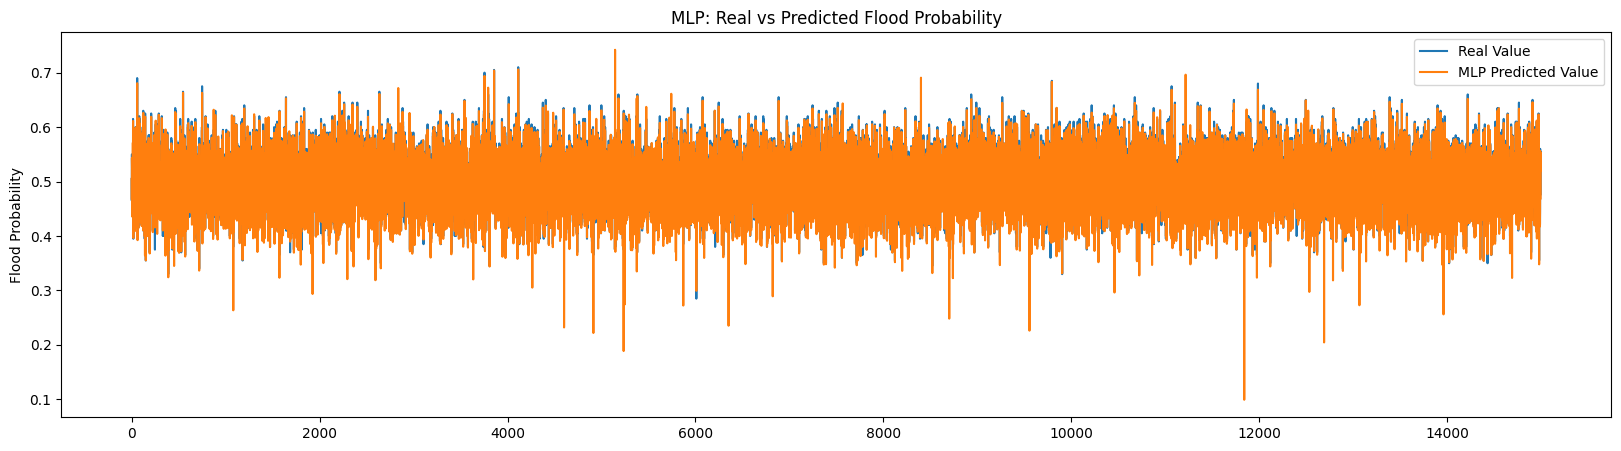

In [ ]:
# Visualizing MLP Predictions Compared to Real Values
plt.figure(figsize=(20, 5))
plt.plot(y_test.values, label='Real Value')
plt.plot(mlp_preds, label='MLP Predicted Value')
plt.ylabel('Flood Probability')
plt.legend()
plt.title('MLP: Real vs Predicted Flood Probability')
plt.show()

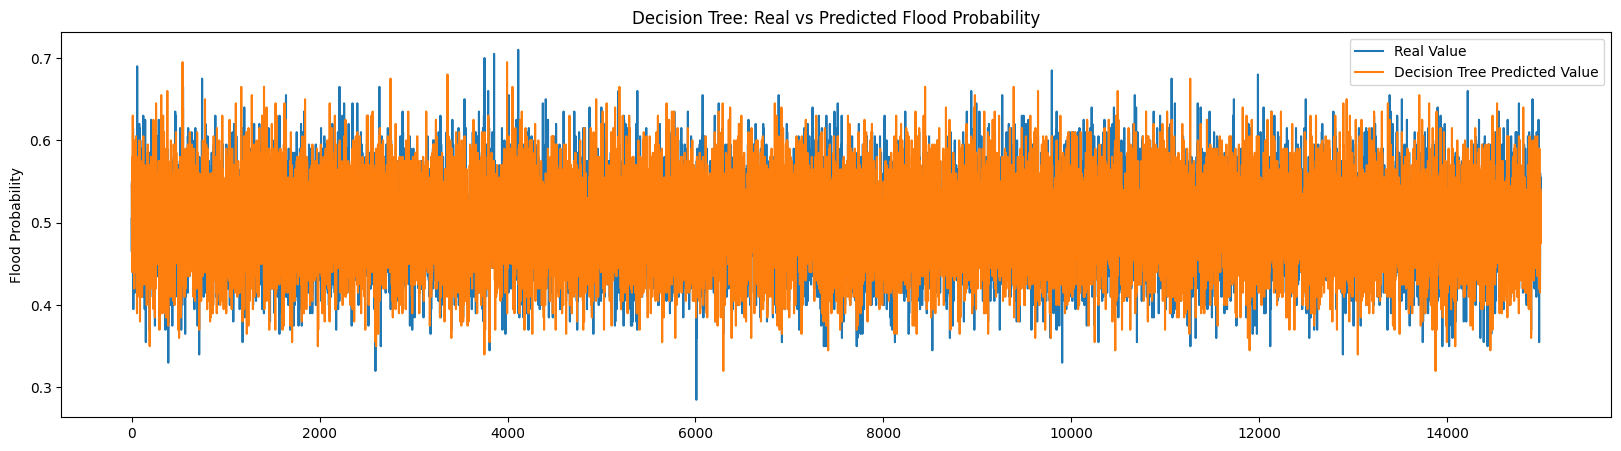

In [ ]:
# Visualizing Decision Tree Predictions Compared to Real Values
plt.figure(figsize=(20, 5))
plt.plot(y_test.values, label='Real Value')
plt.plot(dt_preds, label='Decision Tree Predicted Value')
plt.ylabel('Flood Probability')
plt.legend()
plt.title('Decision Tree: Real vs Predicted Flood Probability')
plt.show()

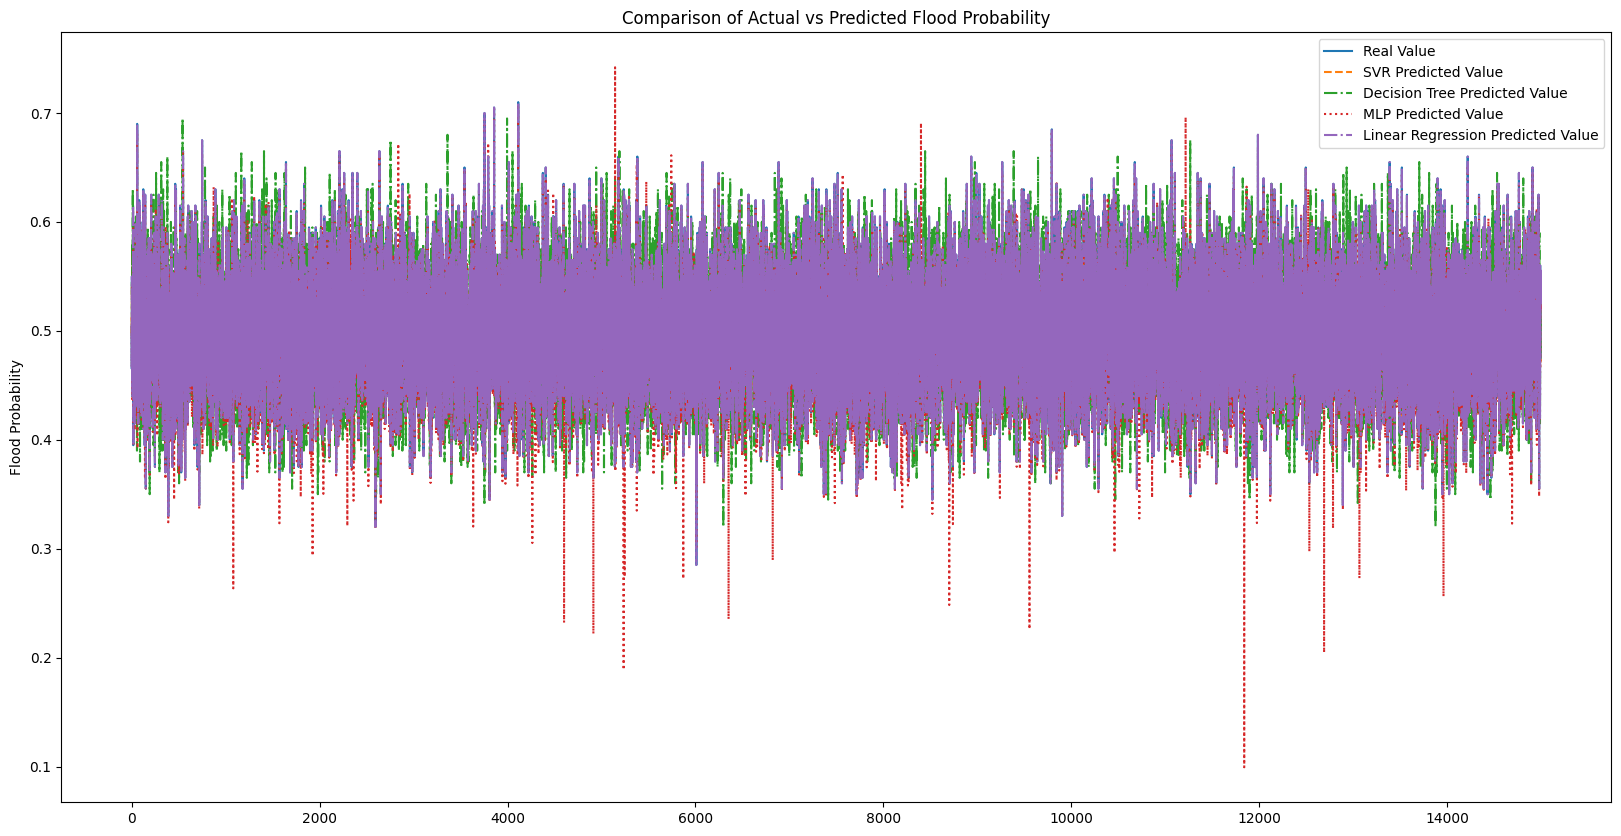

In [ ]:
# Visualizing all four models Predictions Compared to their Real Values
plt.figure(figsize=(20, 10))

plt.plot(y_test.values, label='Real Value')
plt.plot(svr_preds, label='SVR Predicted Value', linestyle='dashed')
plt.plot(dt_preds, label='Decision Tree Predicted Value', linestyle='dashdot')
plt.plot(mlp_preds, label='MLP Predicted Value', linestyle='dotted')
plt.plot(lr_preds, label='Linear Regression Predicted Value', linestyle='-.')

plt.ylabel('Flood Probability')
plt.legend()
plt.title('Comparison of Actual vs Predicted Flood Probability')
plt.show()

# Implement Average Classifier on best performing models

In [ ]:
# Implement an average classifier by calculating the average prediction from the two best performing models
average_prediction = (mlp_preds + lr_preds) / 2

In [ ]:
# Compare the actual values with the Average Classifier model's predicted values
results_avg = pd.DataFrame({'Actual': y_test, 'Average Predicted': average_prediction})
print("Average Prediction from all Models:")
print(results_avg)

Average Prediction from all Models:
       Actual  Average Predicted
27632   0.505           0.504706
36119   0.465           0.465881
4796    0.550           0.546437
3648    0.525           0.523160
24501   0.525           0.522209
...       ...                ...
12829   0.525           0.521978
41873   0.555           0.554294
5356    0.525           0.521980
20046   0.525           0.525776
25470   0.550           0.545711

[15000 rows x 2 columns]


In [ ]:
# Evaluate the performance of the average prediction by comparing it to the actual values
evaluate_model("Average Prediction from all Models:", y_test, average_prediction)

Average Prediction from all Models: Model:
Mean Absolute Error: 0.00324
Mean Squared Error: 0.00005
Root Mean Squared Error: 0.00708
R^2 Score: 0.98004
_________________________________________________


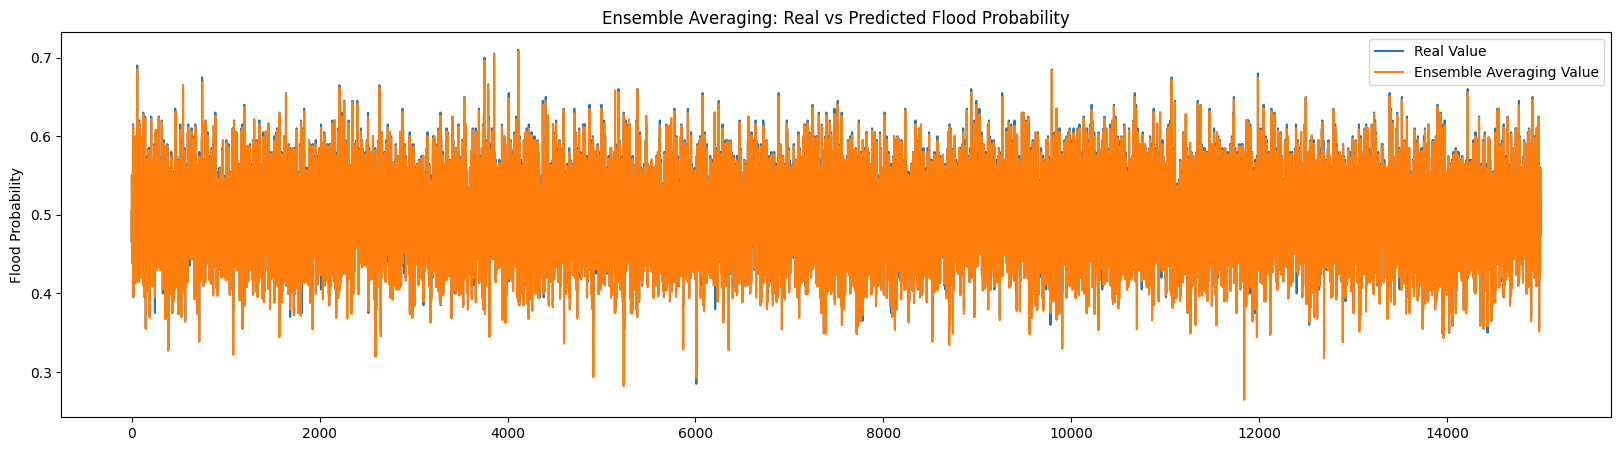

In [ ]:
# Visualizing Average Classifier Predictions Compared to Real Values
plt.figure(figsize=(20, 5))
plt.plot(y_test.values, label='Real Value')
plt.plot(average_prediction, label='Ensemble Averaging Value')
plt.ylabel('Flood Probability')
plt.legend()
plt.title('Ensemble Averaging: Real vs Predicted Flood Probability')
plt.show()

# Import and Load models

In [ ]:
# Save the trained models using joblib
joblib.dump(svr_model, '/content/Models/svr_model.pkl')
joblib.dump(dt_model, '/content/Models/dt_model.pkl')
joblib.dump(mlp_model, '/content/Models/mlp_model.pkl')
joblib.dump(lr_model, '/content/Models/lr_model.pkl')

['/content/Models/lr_model.pkl']

#  Predict using new data

In [ ]:
# Load the previously trained models using joblib

svr_model = joblib.load('/content/Models/svr_model.pkl')
dt_model = joblib.load('/content/Models/dt_model.pkl')
mlp_model = joblib.load('/content/Models/mlp_model.pkl')
lr_model = joblib.load('/content/Models/lr_model.pkl')

In [ ]:
# Input sample data for a new prediction
data = {
    'MonsoonIntensity': [3],
    'TopographyDrainage': [8],
    'RiverManagement': [6],
    'Deforestation': [6],
    'Urbanization': [4],
    'ClimateChange': [4],
    'DamsQuality': [6],
    'Siltation': [2],
    'AgriculturalPractices': [3],
    'Encroachments': [2],
    'IneffectiveDisasterPreparedness': [5],
    'DrainageSystems': [10],
    'CoastalVulnerability': [7],
    'Landslides': [4],
    'Watersheds': [2],
    'DeterioratingInfrastructure': [3],
    'PopulationScore': [4],
    'WetlandLoss': [3],
    'InadequatePlanning': [2],
    'PoliticalFactors': [6]
}

In [ ]:
# Create a DataFrame from the new data
input_data = pd.DataFrame(data)

In [ ]:
# Make predictions using the sample data and the previously trained models
svr_prediction = svr_model.predict(input_data)
dt_prediction = dt_model.predict(input_data)
mlp_prediction = mlp_model.predict(input_data)
lr_prediction = lr_model.predict(input_data)

In [ ]:
# Print new predictions
print("SVR Prediction:", svr_prediction)
print("Decision Tree Prediction:", dt_prediction)
print("MLP Prediction:", mlp_prediction)
print("Linear Regression Prediction:", lr_prediction)

SVR Prediction: [0.4805088]
Decision Tree Prediction: [0.435]
MLP Prediction: [0.44276762]
Linear Regression Prediction: [0.45]
